<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-projects/blob/main/Project_01_House_Price_Prediction_using_ANN/Project_01_House_Price_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview: House Price Prediction using Artificial Neural Network (ANN)**

This notebook outlines a project to predict house prices using an Artificial Neural Network (ANN) model. The key steps involved are:

*   **Importing Packages:** Importing necessary libraries for data manipulation, visualization, and building the neural network.
*   **Data Loading:** Reading the housing data from a CSV file into a pandas DataFrame.
*   **Data Exploration and Preprocessing:**
    *   Displaying the first few rows and information about the dataset.
    *   Checking for and handling missing values (dropping rows with missing 'total_bedrooms').
    *   Examining the distribution of the 'ocean_proximity' categorical feature.
    *   Mapping categorical 'ocean_proximity' values to numerical representations.
*   **Train-Test Split:** Dividing the dataset into training and testing sets for model development and evaluation.
*   **Scaling:** Applying MinMaxScaler to scale the numerical features to a specific range, which is important for ANN performance.
*   **Building Model (ANN):**
    *   Defining the architecture of the Sequential ANN model with Dense and Dropout layers.
    *   Compiling the model with an optimizer ('rmsprop'), loss function ('mse'), and evaluation metric ('mae').
    *   Setting up EarlyStopping to prevent overfitting during training.
*   **Training the Model:** Fitting the ANN model to the training data and validating it on the testing data.
*   **Metrics and Score:**
    *   Making predictions on the test set.
    *   Evaluating the model's performance using various metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Mean Squared Log Error, and R-squared score.
*   **Visualization:**
    *   Plotting the training and validation loss over epochs to visualize the learning process.
    *   Creating scatter plots to compare actual vs. predicted house prices for both training and validation sets.
*   **Predictive System:** Defining a function to take new input features and predict the house price using the trained and scaled model.
*   **Save Model:** Saving the trained ANN model and the fitted MinMaxScaler object for future use.
*   **Version Check:** Displaying the versions of key libraries used in the project for reproducibility.

**Importing Packages**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing modules from scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural network modules from Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [3]:
# Read the housing data from a CSV file into a pandas DataFrame
df = pd.read_csv('/content/housing.csv')
# Display the first 5 rows of the DataFrame
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Check for missing values in each column and sum them up
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
# Drop rows with any missing values from the DataFrame
df.dropna(axis=0, inplace=True)

In [7]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(20433, 10)

In [8]:
# Get the counts of each unique value in the 'ocean_proximity' column
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [9]:
# Map the categorical 'ocean_proximity' values to numerical values
df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY':3, '<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2, 'ISLAND':4})

In [10]:
# Display the first 5 rows of the DataFrame after mapping 'ocean_proximity'
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


# **Train test split**

In [11]:
# Define the features (X) by dropping the target variable 'median_house_value'
X = df.drop('median_house_value', axis=1)
# Define the target variable (y) as the 'median_house_value' column
y = df['median_house_value']
# Print the shapes of the feature and target variables
print(X.shape)
print(y.shape)

(20433, 9)
(20433,)


In [12]:
# Convert the pandas DataFrame and Series to NumPy arrays
X = X.values
y = y.values

In [13]:
# Display the NumPy array X (features)
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  3.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  1.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  1.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  1.0000e+00]])

In [14]:
# Display the NumPy array y (target variable)
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [15]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=123 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Print the shapes of the resulting training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


# **Scaling**

In [16]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()
# Fit and transform the training data
x_train = min_max_scaler.fit_transform(x_train)
# Transform the testing data using the same scaler
x_test = min_max_scaler.transform(x_test)

In [17]:
# Print the scaled training and testing data
print(x_train)
print(x_test)

[[0.54425229 0.30180659 0.66666667 ... 0.06101974 0.21336947 0.25      ]
 [0.30315361 0.58448459 0.56862745 ... 0.00707237 0.27586516 0.25      ]
 [0.6948118  0.16790648 0.09803922 ... 0.25542763 0.25377581 0.25      ]
 ...
 [0.23601221 0.51328374 0.68627451 ... 0.05411184 0.2810375  0.        ]
 [0.19226857 0.55366631 1.         ... 0.06069079 0.26132053 0.75      ]
 [0.51068159 0.19978746 0.43137255 ... 0.12648026 0.29727866 0.5       ]]
[[0.71922686 0.02231668 0.43137255 ... 0.09769737 0.18199749 0.5       ]
 [0.30620549 0.64718385 0.45098039 ... 0.07976974 0.19436284 0.25      ]
 [0.3387589  0.54091392 0.74509804 ... 0.09917763 0.08313678 0.25      ]
 ...
 [0.15055951 0.62274176 0.76470588 ... 0.06973684 0.23342437 0.        ]
 [0.6103764  0.17534538 1.         ... 0.04276316 0.29645798 0.        ]
 [0.72227874 0.08926674 0.25490196 ... 0.13289474 0.31384395 0.        ]]


In [18]:
# Get the number of features in the training data
x_train.shape[1]

9

# **Building model (ANN)**

In [19]:
# Define the model architecture
model = Sequential([
    # input Layer with 1000 neurons and ReLU activation
    Dense(1000, input_shape=(x_train.shape[1],), activation='relu'),
    # Dropout layer to prevent overfitting
    Dropout(0.2),
    # Hidden layer with 500 neurons and ReLU activation
    Dense(500, activation='relu'),
    # Dropout layer to prevent overfitting
    Dropout(0.2),
    # Hidden layer with 250 neurons and ReLU activation
    Dense(250, activation='relu'),
    # Output layer with 1 neuron and linear activation for regression
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

Total Parameters:

The "Total params" section indicates that the model has a total of 636,001 parameters.

These are the weights and biases that the model will learn during training.

Trainable Parameters:

The "Trainable params" section shows that all 636,001 parameters in the model are trainable, meaning they will be updated and adjusted during training to optimize the model's performance.

Non-trainable Parameters:

The "Non-trainable params" section is typically 0, which means there are no parameters that won't be updated during training.

In [21]:
# compile the model and set earlystopping
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss', mode='min',  patience=50, restore_best_weights=True) #verbose=1,

In [22]:
# fit the model (training)

history = model.fit(x_train, y_train, validation_data= (x_test, y_test), callbacks=[es], epochs=10, batch_size=50, verbose=1)

Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 37994696704.0000 - mae: 157565.4375 - val_loss: 10459579392.0000 - val_mae: 80072.9062
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 10034015232.0000 - mae: 79561.0156 - val_loss: 6747354624.0000 - val_mae: 63831.7969
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 6478347776.0000 - mae: 61250.4805 - val_loss: 5618850304.0000 - val_mae: 55319.5430
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 5947080704.0000 - mae: 56882.1406 - val_loss: 5471821824.0000 - val_mae: 53243.5273
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 5839056384.0000 - mae: 55749.2148 - val_loss: 5289587712.0000 - val_mae: 54020.7344
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 5570030080.0000 - mae: 54537.0391 - val_loss: 5094357504.0000 - val_mae: 51531.5039
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 5483914752.0000 - mae: 53392.2188 - val_loss: 4944089600.0000 -

# **Metrics and Score**

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_squared_log_error

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print evaluation metrics
print('mae:', mean_absolute_error(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae: ', mean_squared_log_error(y_test, y_pred))
print('score: ', r2_score(y_test, y_pred))

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
mae: 47554.0480515583
mse: 4499356486.751342
mae:  0.10663964328309788
score:  0.6490864968324643


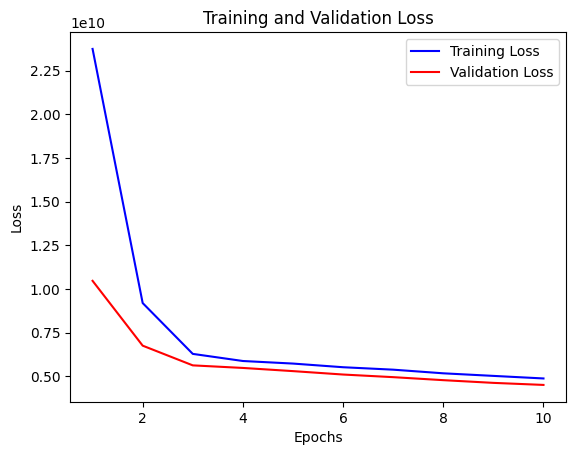

In [24]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')


# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


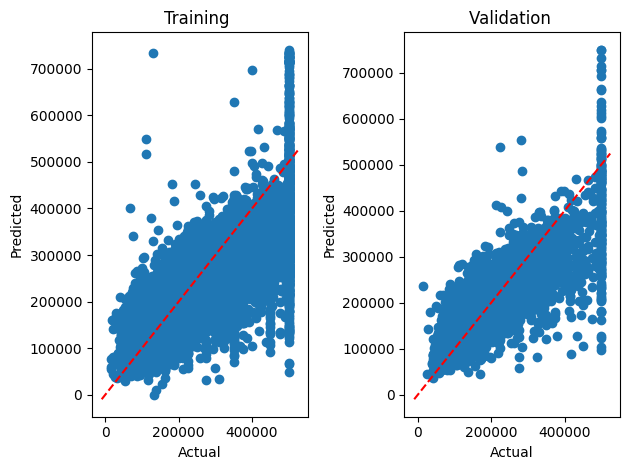

In [25]:
# specify the dimensions
fig, axes = plt.subplots(1, 2)

# this makes the individual subplots
# training results
axes[0].scatter(x = y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize = 10)
axes[0].set_ylabel('Predicted', fontsize = 10)
axes[0].set_title('Training ')

# Add 45 deg line for visual comparison
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, 'r--')

# validation Results
axes[1].scatter(x = y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize = 10)
axes[1].set_ylabel('Predicted', fontsize = 10)
axes[1].set_title('Validation ')

# Add 45 deg line for visual comparison
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, 'r--')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

# **Predictive System**

In [26]:
def pred(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity):
  # Convert input features into a NumPy array
  features = np.array([[longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]])
  # Scale the features using the pre-fitted MinMaxScaler
  features_scaled = min_max_scaler.fit_transform(features)
  # Make a prediction using the trained model and reshape the output
  result= model.predict(features_scaled).reshape(-1,1)
  # Return the predicted value
  return result[0]

In [27]:
# Define input values for prediction
longitude = -122.2300
latitude = 37.8800
housing_median_age = 41.0000
total_rooms = 880.0000
total_bedrooms = 129.0000
population = 322.0000
households = 126.0000
median_income = 8.3252
ocean_proximity = 3.0000

# Call the prediction function with the input values
price = pred(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity)
# Print the predicted price
print(price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[274383.84]


In [28]:
# Display the predicted price
price #  452600.0000 # actual value

array([274383.84], dtype=float32)

# **Save Model**

In [29]:
# Save the trained Keras model to a file named 'model_ann.h5'
model.save('model_ann.h5')

import pickle
# Save the fitted MinMaxScaler object to a file named 'scaler.pkl'
pickle.dump(min_max_scaler, open('scaler.pkl', 'wb'))

Check version and install the same in pychar or VS Code(in production)

In [30]:
import sklearn
import tensorflow as tf
import keras

# Print the versions of scikit-learn, TensorFlow, and Keras
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)